# Homework set 3

Please **submit this Jupyter notebook through Canvas** no later than **Monday December 2**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. On canvas there are hints about creating a nice pdf version.**

Before you hand in, please make sure the notebook runs, by running "Restart kernel and run all cells..." from the Kernel menu.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Job Marcelis, 14000946

Ernani Hazbolatow, 14272210

Run the following cell to import NumPy, Matplotlib. If anything else is needed you can import this yourself.

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Exercise 1: Nonlinear least squares

This exercise is about the Gauss-Newton method, and the Levenberg-Marquardt method, which are discussed in section 6.6 of Heath. Please read this section before making this homework set. **In this exercise set the Levenberg-Marquardt method is a little different from the one in Heath. The first equation in subsection 6.6.2 is replaced by**
$$
\newcommand{\bfA}{\boldsymbol{A}}
\newcommand{\bfB}{\boldsymbol{B}}
\newcommand{\bfJ}{\boldsymbol{J}}
\newcommand{\bfr}{\boldsymbol{r}}
\newcommand{\bfs}{\boldsymbol{s}}
\newcommand{\bfx}{\boldsymbol{x}}
\newcommand{\for}{\text{\bf for }}
\newcommand{\end}{\text{\bf end }}
\bigg(\bfJ^T(\bfx_k) \bfJ(\bfx_k) 
+ \mu_k \operatorname{Diagonal}\big( \bfJ^T(\bfx_k) \bfJ(\bfx_k) \big) \bigg) \bfs_k
= - \bfJ^T(\bfx_k) \, \bfr(\bfx_k)
$$
Here $\operatorname{Diagonal}(\bfB)$ denotes the diagonal part of $\bfB$. So $\operatorname{Diagonal}(\bfB)$ has the same shape as $\bfB$ and identical entries on the diagonal and it has zero off-diagonal entries.

The algorithm for Levenberg-Marquardt, with $\mu_k$ constant (denoted $\mu$ here), is then</br>
$\qquad \bfx_0 = \text{initial guess}$</br>
$\qquad \mu = \text{constant}$</br>
$\qquad \for k = 0,1,2, \ldots$</br>
$\qquad \qquad \bfA = \bfJ_f(\bfx_k)$</br>
$\qquad \qquad \text{solve } \bfs_k \text{ from } 
(\bfA^T \bfA + \mu \operatorname{Diagonal}(\bfA^T \bfA)) \bfs_k = - \bfA^T \bfr(\bfx_k)$</br>
$\qquad \qquad \bfx_{k+1} = \bfx_k + \bfs_k$</br>
$\qquad \end$</br>

This reduces to the Gauss-Newton method if $\mu = 0$. 

## (a)
Implement the Levenberg-Marquardt method with constant $\mu$ using a suitable stopping criterion. 
Make it such that the user can specify the value of the tolerance in the stopping criterion via a parameter `tol` and the maximum number of iterations via a
parameter `maxIter`. In the implementation you can use library functions for linear algebra operations. 

In [117]:
def Levenberg_Marquardt(x0, mu, jac, r, tol, maxIter):
    x = x0

    for i in range(maxIter):
        A = jac(x)
        residuals = r(x)
        A_T_A = A.T @ A
        A_T_r = A.T @ residuals

        s = np.linalg.solve(A_T_A + mu * np.diag(np.diag(A_T_A)), -A_T_r)
        x_new = x + s

        if np.linalg.norm(s) < tol:
            return x_new, i + 1
        
        x = x_new
    
    if mu == 0:
        print(f'Gauss-Newton did not converge within {maxIter} iterations.')
    else:
        print(f'Levenberg-Marquardt did not converge within {maxIter} iterations.')

    return x, maxIter

## (b) 

The time course of drug concentration $y$ in the bloodstream is well described by
$$ \tag{1}
  y = c_1 t e^{c_2 t} ,
$$
where $t$ denotes time after the drug was administered. The characteristics of the model
are a quick rise as the drug enters the bloodstream, followed by slow exponential decay.
The half-life of the drug is the time from the peak concentration to the time it drops to
half that level. The measured level of the drug norfluoxetine in a patient's bloodstream at whole hours after it was administered is given in the following data:

In [118]:
# time in hours
hour = np.array( [ 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0 ] )
# concentration in ng/ml
concentration = np.array( [ 8.0, 12.3, 15.5, 16.8, 17.1, 15.8, 15.2, 14.0 ] )

Use the Gauss-Newton method to fit this data to the blood concentration model (1).

Also use the Levenberg-Marquardt method with $\mu =0.1$ to address the same problem.

Which method produces the least number of iterations? N.B. clearly state the starting point. 

You are asked to use your own version of Gauss-Newton and Levenberg-Marquardt.

In [135]:
def jac(x):
    jac_x = np.zeros((len(hour), len(x)))

    for i in range(len(hour)):
        jac_x[i, 0] = hour[i] * np.exp(x[1] * hour[i])
        jac_x[i, 1] = x[0] * hour[i]**2 * np.exp(x[1] * hour[i])

    return jac_x

def r(x):
    residuals = np.zeros(len(hour))

    for i in range(len(hour)):
        residuals[i] = x[0] * hour[i] * np.exp(x[1] * hour[i]) - concentration[i]

    return residuals

In [120]:
c0 = [1, 0.1]
c_GN, n_iter_GN = Levenberg_Marquardt(c0, 0, jac, r, 1e-6, 100)
print(f'Converged to: {c_GN} in {n_iter_GN} iterations')
c_LM, n_iter_LM = Levenberg_Marquardt(c0, 0.1, jac, r, 1e-6, 100)
print(f'Converged to: {c_LM} in {n_iter_LM} iterations')

Converged to: [ 9.79692816 -0.21508717] in 15 iterations
Converged to: [ 9.79692699 -0.21508714] in 32 iterations


In [121]:
def concentration_func(c, t):
    return c[0] * t * np.exp(c[1] * t)

In [122]:
# Plotting for Gauss-Newton and Levenberg_Marquardt
x_vals = np.linspace(0, 8, 100)
y_GN = concentration_func(c_GN, x_vals)
y_LM = concentration_func(c_LM, x_vals)

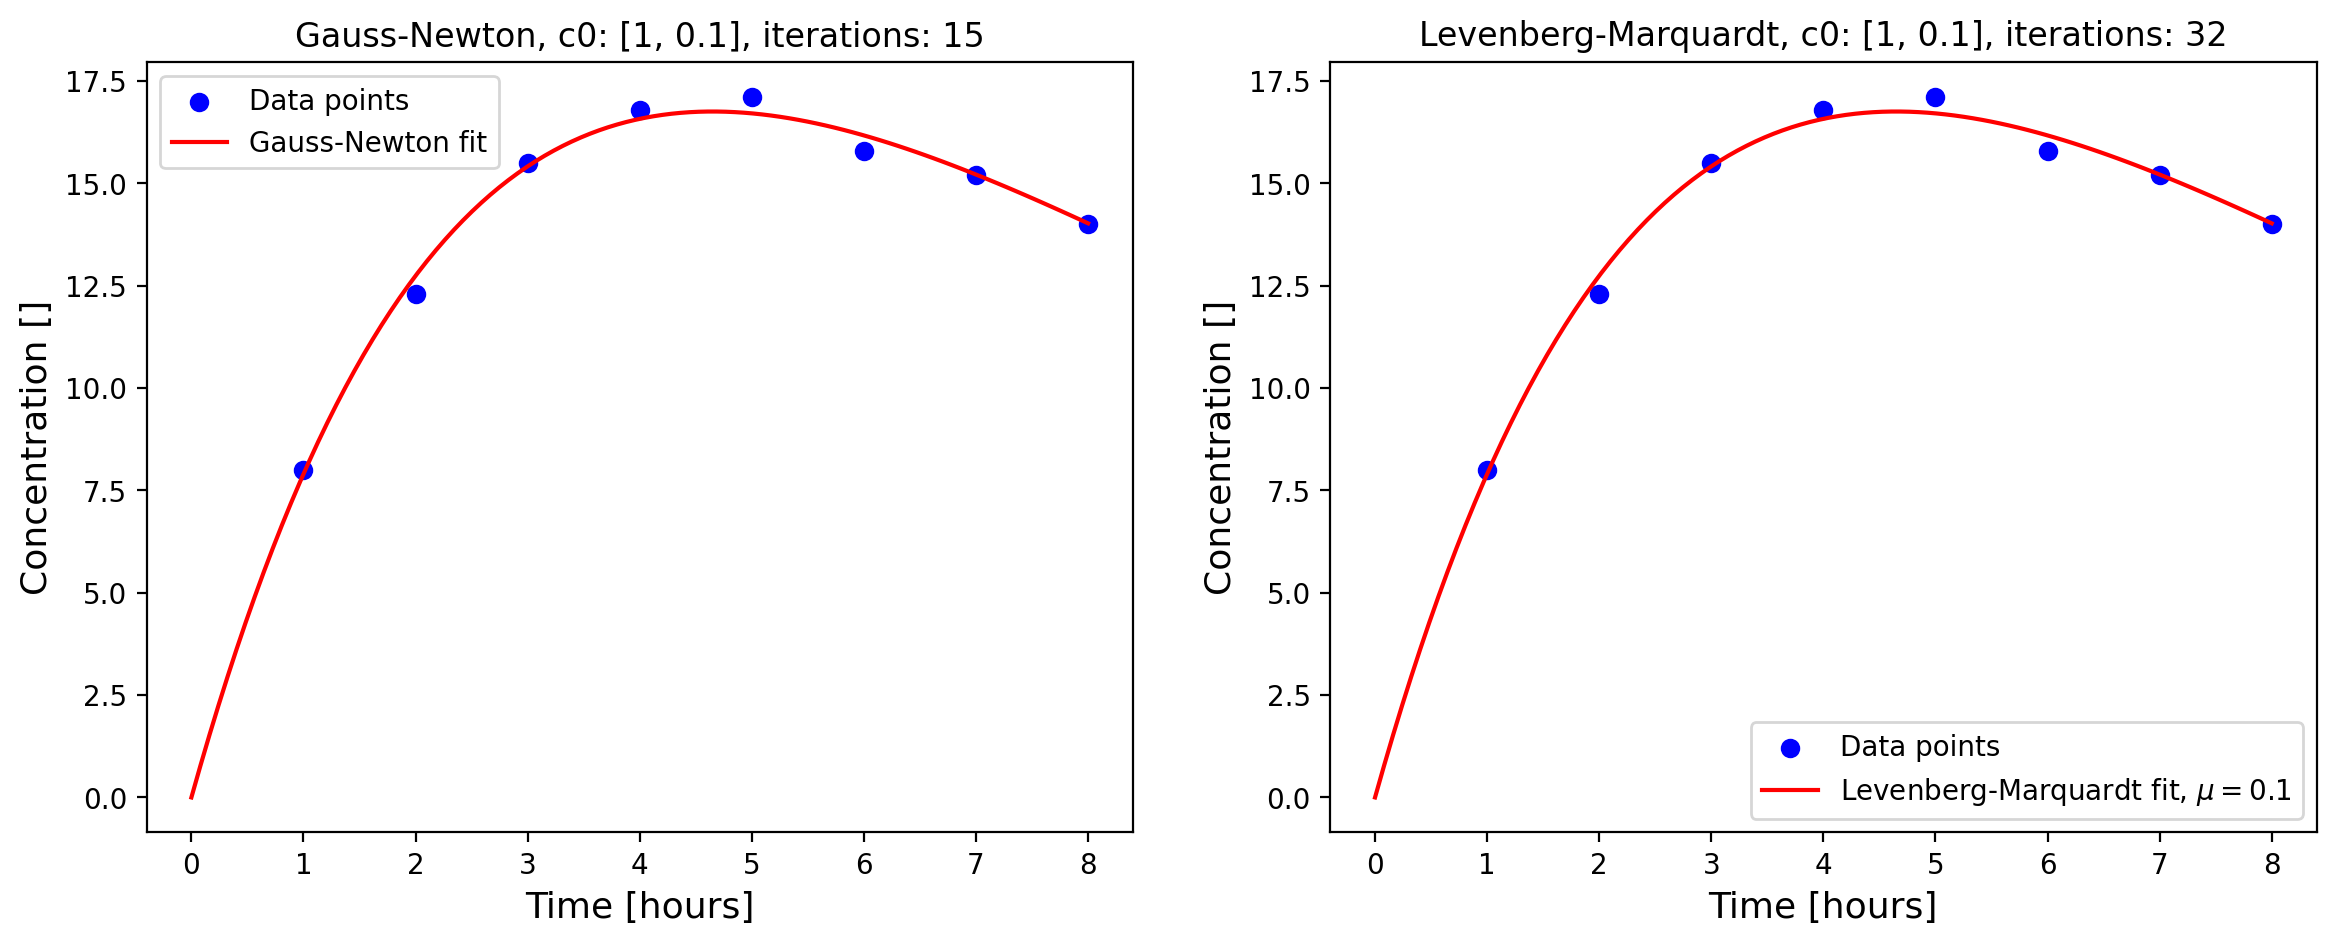

In [123]:
plt.figure(figsize=(14, 5), dpi=200)

plt.subplot(1, 2, 1)
plt.scatter(hour, concentration, color='blue', label='Data points')
plt.plot(x_vals, y_GN, color='red', label='Gauss-Newton fit')
plt.xlabel('Time [hours]', fontsize=13)
plt.ylabel('Concentration []', fontsize=13)
plt.title(f'Gauss-Newton, c0: {c0}, iterations: {n_iter_GN}')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(hour, concentration, color='blue', label='Data points')
plt.plot(x_vals, y_LM, color='red', label=r'Levenberg-Marquardt fit, $\mu = 0.1$')
plt.xlabel('Time [hours]', fontsize=13)
plt.ylabel('Concentration []', fontsize=13)
plt.title(f'Levenberg-Marquardt, c0: {c0}, iterations: {n_iter_LM}')
plt.legend()

plt.show()

The figure above shows the results of the fitting, Gauss-Newton on the left and Levenberg-Marquardt on the right. For both methods, the starting point for c was $c_0 = [1, 0.1]$. The Gauss-Newton method converged within 15 iterations, while the Levenberg-Marquardt converged in 32 iterations. The upside of using Levenberg-Marquardt is that it can handle ill-conditioned problems better than Gauss-Newton. The parameter $\mu$ effectively damps the updates which gives a better balance between fast-convergence and robustness. This logically requires more iterations.

# (c)
Try to find a starting point such that Gauss-Newton does not converge, while Levenberg-Marquardt does.



In [141]:
c0 = [10, 1]
c_GN, n_iter_GN = Levenberg_Marquardt(c0, 0, jac, r, 1e-6, 10000)
print(f'Converged to: {c_GN} in {n_iter_GN} iterations')
c_LM, n_iter_LM = Levenberg_Marquardt(c0, 0.1, jac, r, 1e-6, 10000)
print(f'Converged to: {c_LM} in {n_iter_LM} iterations')

Converged to: [ 9.79692816 -0.21508717] in 15 iterations
Converged to: [ 9.79692682 -0.21508714] in 46 iterations


In [195]:
c0 = [1, 10]
c_GN, n_iter_GN = Levenberg_Marquardt(c0, 0, jac, r, 1e-6, 100)
print(f'Converged to: {c_GN} in {n_iter_GN} iterations')
c_LM, n_iter_LM = Levenberg_Marquardt(c0, 0.1, jac, r, 1e-6, 10000)
print(f'Converged to: {c_LM} in {n_iter_LM} iterations')

Converged to: [ 0.         10.00000095] in 3 iterations
Converged to: [ 9.79692717 -0.21508715] in 4456 iterations


As shown above, for points $c_0 = [1,10]$, Gauss-Newton does not converge (to the right solution), but Levenberg-Marquadt does. The poor choice of starting points causes a poor approximation of the curvature of function as the matrix becomes ill-conditioned. Then, updates become unstable and Gauss-Newton diverges to the wrong solution. 


 Levenberg-Marquadt is better safeguarded by the dampening effect of $\mu$. Thus, LM does converge to the right solution (albeit in many iterations).

# (d) 
So far for simplicity, we considered constant $\mu$. However
Levenberg-Marquardt is often applied adaptively with a varying $\mu$. 
A common strategy is to continue to decrease $\mu$ by a factor of 10 on each iteration step as long as the residual sum of squared errors is decreased by the step, and if the sum increases, to reject the step and increase $\mu$ by a factor of 10.

Implement an adaptive variant of Levenberg-Marquardt using such a strategy for choosing $\mu$. 

Compare the performance (iteration number) of the adaptive variant with Gauss-Newton and the previous, non-adaptive variant of Levenberg-Marquardt. Consider a starting point for which Gauss-Newton converged rapidly and a starting point for which Gauss-Newton did not converge, but non-adaptive Levenberg-Marquardt did. Give your answer in a table for clarity, also indicating the starting point and if relevant other parameters.

In [199]:
def Adaptive_Levenberg_Marquardt(x0, mu, jac, r, tol, maxIter):
    x = x0

    for i in range(maxIter):
        A = jac(x)
        residuals = r(x)
        A_T_A = A.T @ A
        A_T_r = A.T @ residuals

        s = np.linalg.solve(A_T_A + mu * np.diag(np.diag(A_T_A)), -A_T_r)
        x_new = x + s

        if np.linalg.norm(s) < tol:
            return x_new, i + 1
        
        if np.linalg.norm(r(x_new)) < np.linalg.norm(residuals):
            # Residual decreased
            mu = mu / 10
        else:
            # Residual increased
            mu = mu * 10
        x = x_new
    
    if mu == 0:
        print(f'Gauss-Newton did not converge within {maxIter} iterations.')
    else:
        print(f'Levenberg-Marquardt did not converge within {maxIter} iterations.')

In [203]:
c0 = [1, 0.1]
c_GN, n_iter_GN = Adaptive_Levenberg_Marquardt(c0, 0, jac, r, 1e-6, 100)
print(f'Converged to: {c_GN} in {n_iter_GN} iterations')
c_LM, n_iter_LM = Adaptive_Levenberg_Marquardt(c0, 0.1, jac, r, 1e-6, 100)
print(f'Converged to: {c_LM} in {n_iter_LM} iterations')

Converged to: [ 9.79692816 -0.21508717] in 15 iterations
Converged to: [ 9.79692816 -0.21508717] in 8 iterations


In [205]:
c0 = [0.1, 10]
c_GN, n_iter_GN = Adaptive_Levenberg_Marquardt(c0, 0, jac, r, 1e-6, 10000)
print(f'Converged to: {c_GN} in {n_iter_GN} iterations')
c_LM, n_iter_LM = Adaptive_Levenberg_Marquardt(c0, 0.1, jac, r, 1e-6, 10000)
print(f'Converged to: {c_LM} in {n_iter_LM} iterations')

Converged to: [ 0.         10.00000022] in 2 iterations
Converged to: [0.         9.38376334] in 16 iterations


In [208]:
c0 = [0.1, 10]
c_GN, n_iter_GN = Levenberg_Marquardt(c0, 0, jac, r, 1e-6, 100)
print(f'Converged to: {c_GN} in {n_iter_GN} iterations')
c_LM, n_iter_LM = Levenberg_Marquardt(c0, 0.1, jac, r, 1e-6, 10000)
print(f'Converged to: {c_LM} in {n_iter_LM} iterations')

Converged to: [ 0.         10.00000022] in 2 iterations
Converged to: [ 9.79692716 -0.21508715] in 5021 iterations


\[
\begin{array}{|c|c|c|}
\hline
\textbf{Methods}& \textbf{Iterations [1, 0.1], $\mu = 0.1$} & \textbf{Iterations [0.1, 10], $\mu = 0.1$} \\
\hline
\text{Gauss-Newton}                 & 15 & \text{Diverges to wrong solution} \\
\text{Levenberg-Marquardt}          & 32 & 5021 \\
\text{Adaptive Levenberg-Marquardt} & 8  & \text{Diverges to wrong solution} \\
\hline
\end{array}
\]


The above table summarises the results for the three methods and the two different starting values for $[c_1, c_2]$. 